In [2]:
import numpy as np

def createClusteredData(N, k):
    np.random.seed(1234)
    pointsPerCluster = float(N)/k
    X = [] # Incomes and ages
    y = [] # Clusters que esses dados pertencem
    for i in range(k):
        incomeCentroid = np.random.uniform(20000.0, 200000.0) # Centróide que vai gerar os dados de renda
        ageCentroid = np.random.uniform(20.0, 70.0) # Centróide que vai gerar os dados de idade
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid, 10000.0), np.random.normal(ageCentroid, 2.0)]) # Gera os dados de renda e idade com base nos centróides
            y.append(i) # Adiciona o cluster que esses dados pertencem
    X = np.array(X)
    y = np.array(y)
    return X, y

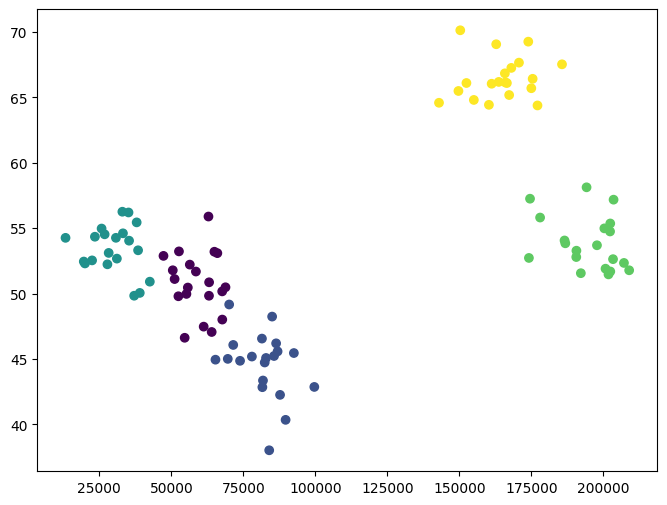

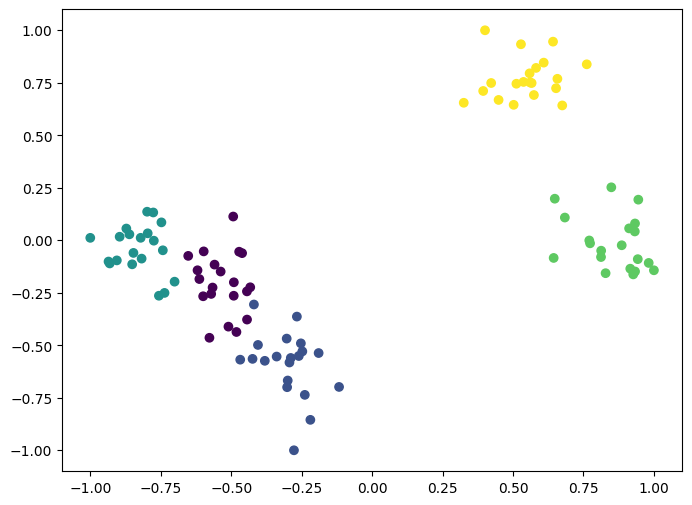

In [ ]:
import matplotlib as plt
from pylab import *
from sklearn.preprocessing import MinMaxScaler

(X, y) = createClusteredData(100, 5) # Gera 100 dados divididos em 5 clusters

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], # Renda 
            X[:,1], # Idade
            c=y.astype(np.float64))
plt.show()

scaling = MinMaxScaler(feature_range=(-1,1)).fit(X) # Escala os dados entre -1 e 1 para que o KMeans funcione melhor
X = scaling.transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float64))
plt.show()

In [6]:
from sklearn import svm, datasets

C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(X, y) # Cria o modelo SVM

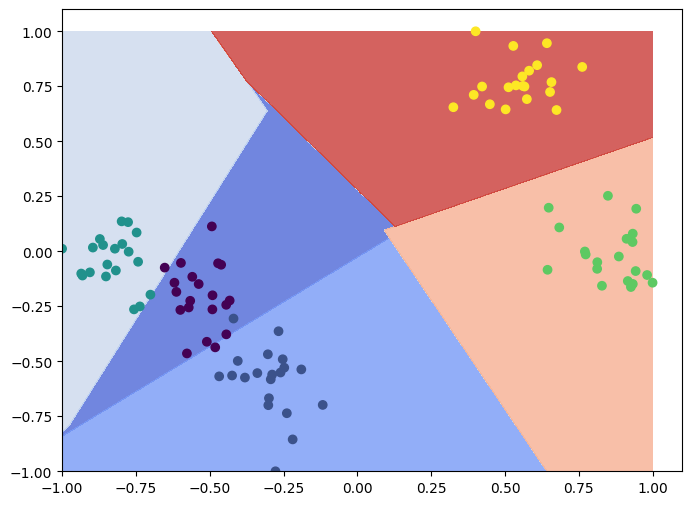

In [9]:
def plotPredictions(clf):
    xx, yy = np.meshgrid(np.arange(-1, 1, .001), 
                         np.arange(-1, 1, .001)) # Gera um grid de -1 a 1
    
    npx = xx.ravel()
    npy = yy.ravel()
    
    samplePoints = np.c_[npx, npy] # Cria um array com os pontos do grid
    
    Z = clf.predict(samplePoints) # Faz a predição para cada ponto do grid
    
    plt.figure(figsize=(8, 6))
    Z = Z.reshape(xx.shape) # Reshape para o formato do grid
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8) # Plota o grid
    plt.scatter(X[:,0], X[:,1], c=y.astype(np.float64)) # Plota os dados
    plt.show()

plotPredictions(svc) # Plota a predição do SVM

In [10]:
print(svc.predict(scaling.transform([[200000, 40]]))) # Prediz um novo dado

[3]


In [11]:
print(svc.predict(scaling.transform([[50000, 65]]))) # Prediz um novo dado

[2]
